In [1]:
from ast import Mod
from enum import Enum
import random
import uuid
import networkx as nx
import matplotlib.pyplot as plt

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from mesa.space import NetworkGrid

from model import *


<AxesSubplot:>

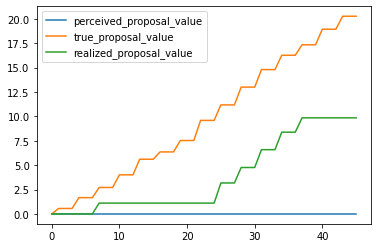

In [6]:
model = MolochDAO()
model.run()
model_df = model.datacollector.get_model_vars_dataframe()
# model_df.head()
model_df.head()
model_df.plot()